# Human‑Likeness Study: Data Analysis

This notebook analyses the responses from the human‑likeness evaluation pilot study. It reproduces the key plots and descriptive statistics used in the accompanying report.

> **Note:** Sensitive columns such as participant names, emails and unique IDs are dropped for privacy.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Display plots inline
%matplotlib inline

# Load the data (specify Latin-1 encoding to handle special characters)
file_path = 'data/hal_prolific_survey_responses.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df.head()

,Id,Start time,Completion time,Email,Name,4 Digit User ID (This ID is your Prolific Completion Code),"Human-like Criteria:\n\nIn this study, what criteria did you use to judge which chatbot was more human-like?",Improve Human-likeness:\n\nWhat are some human-like traits that are missing in all chatbots you have interacted with?,Age:\n\nWhat is your age?,Gender: \n\nHow do you describe your gender?,Education Level:\n\nWhat is the highest level of education you have completed?,"Familiarity with AI Chatbots:\n\nHow frequently have you used AI chatbots (e.g., ChatGPT, Claude, Gemini)?",Detecting AI:\n\nHow confident are you in distinguishing between human-generated and AI-generated responses?\n
0,10,1/3/2026 15:55,1/3/2026 15:56,anonymous,NaN,XXXX,I looked at the way they communicated. Looked ...,The are too able to answer questions accuratel...,45-54,Woman,Some college,Daily or almost daily,Moderately confident
1,11,1/3/2026 16:01,1/3/2026 16:03,anonymous,NaN,XXXX,I felt that a human-like response would be sho...,"I feel that some misspelled words, some slang ...",25-34,Man,Some college,Daily or almost daily,Somewhat confident
2,12,1/3/2026 16:19,1/3/2026 16:22,anonymous,NaN,XXXX,Did the reponse sound like it was plausable fo...,They sometimes were not answering the question...,45-54,Woman,High school or equivalent,A few times a week,Moderately confident
3,13,1/3/2026 16:28,1/3/2026 16:30,anonymous,NaN,XXXX,if it had feelings and rambled on like a human,"rambling, feelings, emotions",25-34,Man,Some college,Daily or almost daily,Moderately confident
4,14,1/3/2026 16:40,1/3/2026 16:42,anonymous,NaN,XXXX,"I mostly just went with gut feeling, honestly....",I'd say punctuation and spelling mistakes. The...,18-24,Non-binary,High school or equivalent,"I used to use them daily, but no longer.",Very confident


In [7]:
# Drop sensitive columns if present
sensitive_cols = ['Email', 'Name', '4 Digit User ID (This ID is your Prolific Completion Code)']
for col in sensitive_cols:
    if col in df.columns:
        df = df.drop(columns=col)
df.head()

,Id,Start time,Completion time,"Human-like Criteria:\n\nIn this study, what criteria did you use to judge which chatbot was more human-like?",Improve Human-likeness:\n\nWhat are some human-like traits that are missing in all chatbots you have interacted with?,Age:\n\nWhat is your age?,Gender: \n\nHow do you describe your gender?,Education Level:\n\nWhat is the highest level of education you have completed?,"Familiarity with AI Chatbots:\n\nHow frequently have you used AI chatbots (e.g., ChatGPT, Claude, Gemini)?",Detecting AI:\n\nHow confident are you in distinguishing between human-generated and AI-generated responses?\n
0,10,1/3/2026 15:55,1/3/2026 15:56,I looked at the way they communicated. Looked ...,The are too able to answer questions accuratel...,45-54,Woman,Some college,Daily or almost daily,Moderately confident
1,11,1/3/2026 16:01,1/3/2026 16:03,I felt that a human-like response would be sho...,"I feel that some misspelled words, some slang ...",25-34,Man,Some college,Daily or almost daily,Somewhat confident
2,12,1/3/2026 16:19,1/3/2026 16:22,Did the reponse sound like it was plausable fo...,They sometimes were not answering the question...,45-54,Woman,High school or equivalent,A few times a week,Moderately confident
3,13,1/3/2026 16:28,1/3/2026 16:30,if it had feelings and rambled on like a human,"rambling, feelings, emotions",25-34,Man,Some college,Daily or almost daily,Moderately confident
4,14,1/3/2026 16:40,1/3/2026 16:42,"I mostly just went with gut feeling, honestly....",I'd say punctuation and spelling mistakes. The...,18-24,Non-binary,High school or equivalent,"I used to use them daily, but no longer.",Very confident


In [8]:

# Rename columns for easier access
rename_map = {
    df.columns[3]: 'Human_Criteria',
    df.columns[4]: 'Missing_Traits',
    df.columns[5]: 'Age',
    df.columns[6]: 'Gender',
    df.columns[7]: 'Education_Level',
    df.columns[8]: 'Chatbot_Use',
    df.columns[9]: 'AI_Detection_Confidence'
}

small_df = df.rename(columns=rename_map)[list(rename_map.values())]

# Inspect the first few rows
small_df.head()

,Human_Criteria,Missing_Traits,Age,Gender,Education_Level,Chatbot_Use,AI_Detection_Confidence
0,I looked at the way they communicated. Looked ...,The are too able to answer questions accuratel...,45-54,Woman,Some college,Daily or almost daily,Moderately confident
1,I felt that a human-like response would be sho...,"I feel that some misspelled words, some slang ...",25-34,Man,Some college,Daily or almost daily,Somewhat confident
2,Did the reponse sound like it was plausable fo...,They sometimes were not answering the question...,45-54,Woman,High school or equivalent,A few times a week,Moderately confident
3,if it had feelings and rambled on like a human,"rambling, feelings, emotions",25-34,Man,Some college,Daily or almost daily,Moderately confident
4,"I mostly just went with gut feeling, honestly....",I'd say punctuation and spelling mistakes. The...,18-24,Non-binary,High school or equivalent,"I used to use them daily, but no longer.",Very confident


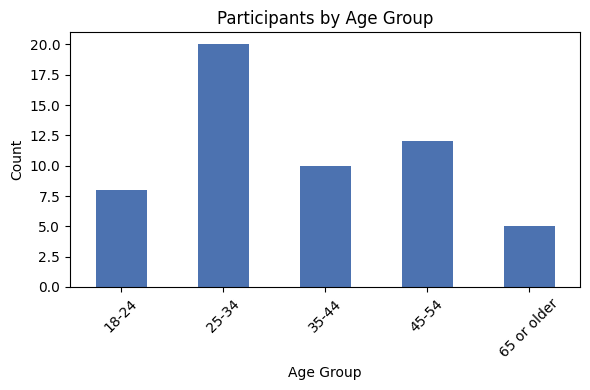

Age
18-24           8
25-34          20
35-44          10
45-54          12
65 or older     5
Name: count, dtype: int64


In [17]:
# Age distribution
age_order = ['18-24','25-34','35-44','45-54','65 or older']
age_counts = small_df['Age'].value_counts().reindex(age_order)
plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='#4c72b0')
plt.title('Participants by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(age_counts)

In [18]:
import pandas as pd
import numpy as np

age_counts = pd.Series(
    [8, 20, 10, 12, 5],
    index=['18-24','25-34','35-44','45-54','65 or older']
)

age_midpoints = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '65 or older': 70
}

mean_age = np.average(
    [age_midpoints[a] for a in age_counts.index],
    weights=age_counts.values
)

mean_age

np.float64(38.127272727272725)

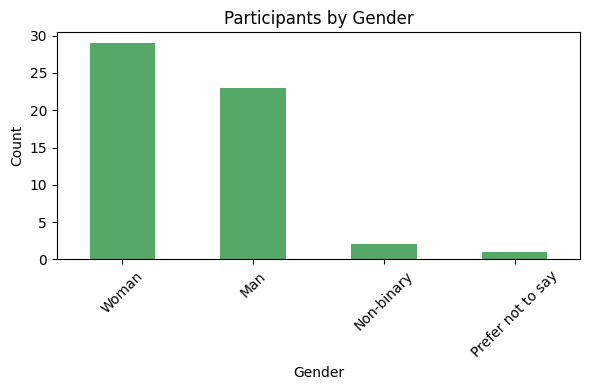

Gender
Woman                29
Man                  23
Non-binary            2
Prefer not to say     1
Name: count, dtype: int64

In [19]:
# Gender distribution
gender_counts = small_df['Gender'].value_counts()
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color='#55a868')
plt.title('Participants by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
gender_counts

In [20]:
gender_percent = (
    small_df['Gender']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

gender_percent

Gender
Woman                52.73
Man                  41.82
Non-binary            3.64
Prefer not to say     1.82
Name: proportion, dtype: float64

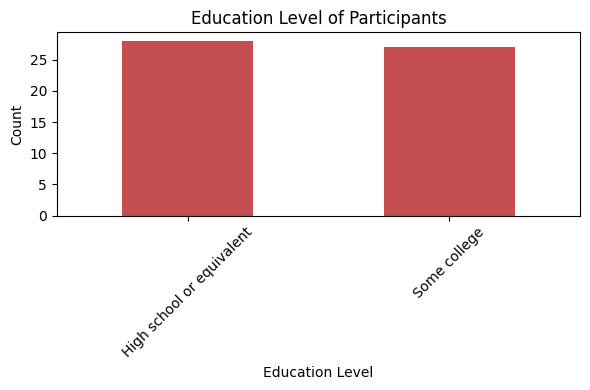

In [11]:
# Education level distribution
ed_counts = small_df['Education_Level'].value_counts()
plt.figure(figsize=(6,4))
ed_counts.plot(kind='bar', color='#c44e52')
plt.title('Education Level of Participants')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

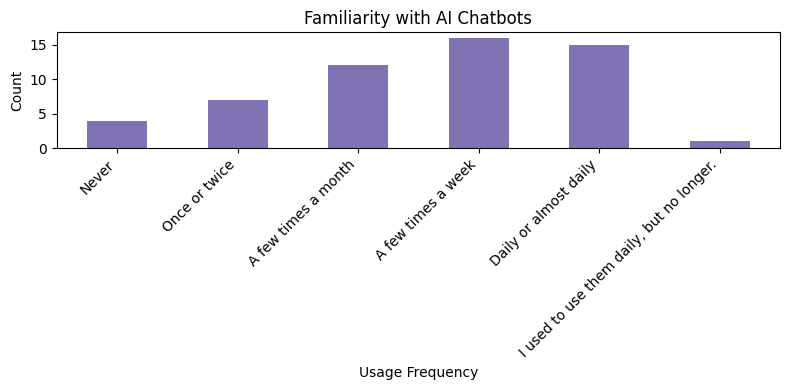

In [12]:
# Chatbot usage frequency
use_order = ['Never','Once or twice','A few times a month','A few times a week','Daily or almost daily','I used to use them daily, but no longer.']
usage_counts = small_df['Chatbot_Use'].value_counts().reindex(use_order)
plt.figure(figsize=(8,4))
usage_counts.plot(kind='bar', color='#8172b3')
plt.title('Familiarity with AI Chatbots')
plt.ylabel('Count')
plt.xlabel('Usage Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

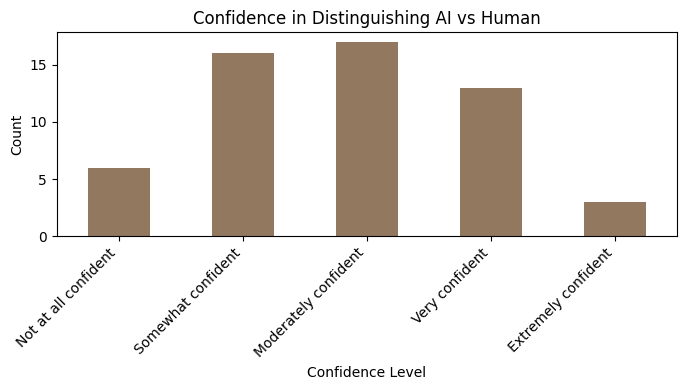

In [13]:
# AI detection confidence distribution
confidence_order = ['Not at all confident','Somewhat confident','Moderately confident','Very confident','Extremely confident']
conf_counts = small_df['AI_Detection_Confidence'].value_counts().reindex(confidence_order)
plt.figure(figsize=(7,4))
conf_counts.plot(kind='bar', color='#937860')
plt.title('Confidence in Distinguishing AI vs Human')
plt.ylabel('Count')
plt.xlabel('Confidence Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

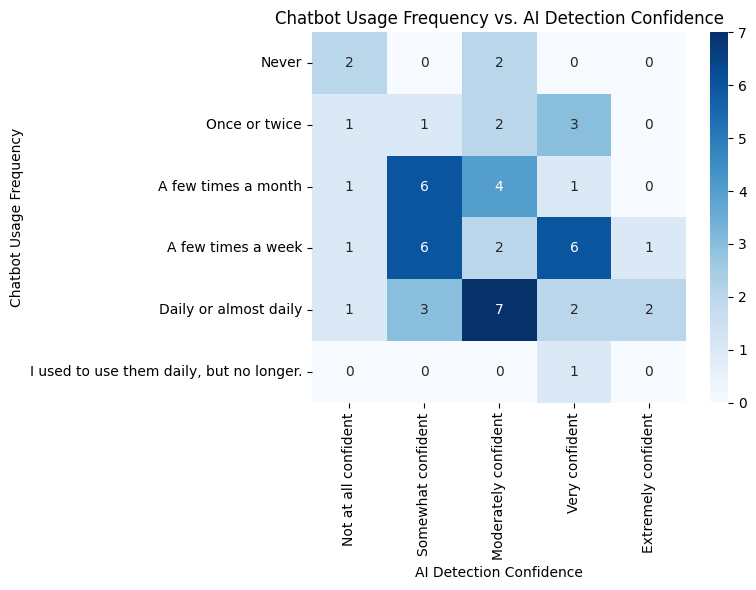

In [14]:
# Crosstab and heatmap for Chatbot Use vs AI Detection Confidence
crosstab = pd.crosstab(small_df['Chatbot_Use'], small_df['AI_Detection_Confidence'])
# Order index and columns logically
use_order = ['Never','Once or twice','A few times a month','A few times a week','Daily or almost daily','I used to use them daily, but no longer.']
confidence_order = ['Not at all confident','Somewhat confident','Moderately confident','Very confident','Extremely confident']
crosstab = crosstab.reindex(index=use_order, columns=confidence_order)
# Replace missing values with 0
crosstab = crosstab.fillna(0)
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='Blues')
plt.title('Chatbot Usage Frequency vs. AI Detection Confidence')
plt.xlabel('AI Detection Confidence')
plt.ylabel('Chatbot Usage Frequency')
plt.tight_layout()
plt.show()

Top criteria words: [('also', 13), ('too', 12), ('not', 12), ('way', 11), ('responses', 11), ('how', 11), ('used', 11), ('natural', 10), ('felt', 9), ('would', 9)]
Top missing trait words: [('not', 25), ('too', 16), ('some', 13), ('slang', 8), ('way', 8), ('humans', 8), ('felt', 8), ('feel', 7), ('all', 7), ('chatbots', 7)]


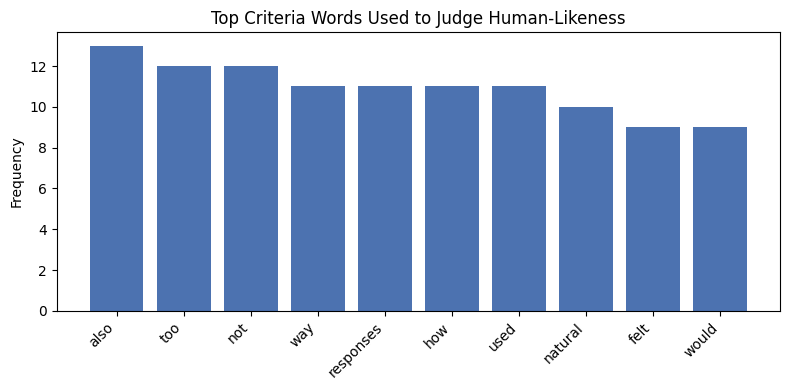

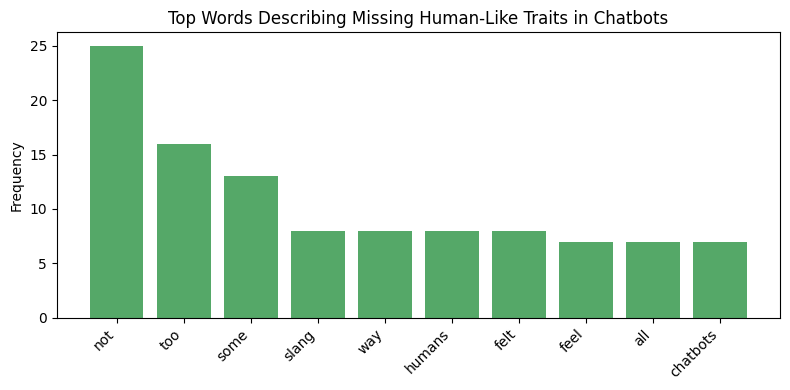

In [15]:
# Word frequency analysis for criteria and missing traits

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", ' ', text)
    return text

# Concatenate all responses
criteria_text = ' '.join(small_df['Human_Criteria'].dropna().astype(str))
missing_text = ' '.join(small_df['Missing_Traits'].dropna().astype(str))

criteria_clean = clean_text(criteria_text)
missing_clean = clean_text(missing_text)

# Define a simple set of stop words
stop_words = set(['the','and','to','of','a','in','for','that','with','is','as','it','on','are','be','was','were','an','or','we','our','i','they','them','this','which','more','you','their','have','has','had','but','being','human','like'])

criteria_words = [w for w in criteria_clean.split() if w not in stop_words and len(w) > 2]
missing_words = [w for w in missing_clean.split() if w not in stop_words and len(w) > 2]

criteria_counts = Counter(criteria_words)
missing_counts = Counter(missing_words)

# Display top 10 words
criteria_top = criteria_counts.most_common(10)
missing_top = missing_counts.most_common(10)

print('Top criteria words:', criteria_top)
print('Top missing trait words:', missing_top)

# Plot top criteria words
if criteria_top:
    words, counts = zip(*criteria_top)
    plt.figure(figsize=(8,4))
    plt.bar(words, counts, color='#4c72b0')
    plt.title('Top Criteria Words Used to Judge Human-Likeness')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot top missing trait words
if missing_top:
    words2, counts2 = zip(*missing_top)
    plt.figure(figsize=(8,4))
    plt.bar(words2, counts2, color='#55a868')
    plt.title('Top Words Describing Missing Human-Like Traits in Chatbots')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()